In [ ]:
from comet_ml import Experiment, ExistingExperiment
from pytorch_lightning.loggers import CometLogger

logger = CometLogger(
            api_key=settings.comet['api_key'],
            workspace=settings.comet['workspace'],
            project_name=settings.comet['project_name2'])

In [74]:
desired_metrics = [ 'geometric_mean_vas',
                    'harmonic_mean_vas', 
                    'hmean_auc_sa_003', 
                    'arthmetic_mean_vas', 
                    'mean_auc_sa_003', 
                    'gmean_auc_sa_003']

In [75]:
from comet_ml.api import API, APIExperiment
from config import settings
from tqdm import tqdm

comet_api = API(settings.comet['api_key'])
experiments = comet_api.get(workspace=settings.comet['workspace'], project_name='psm-mdof2')
metrics_dict = {}

for experiment in tqdm(experiments):
    # Replace with the actual ID of the experiment you want to retrieve data from
    experiment_id = experiment.id
    #let's load the experiment
    experiment = comet_api.get_experiment(project_name='psm-mdof2',workspace=settings.comet['workspace'],experiment=experiment_id)
    #let's get the metrics
    metrics = experiment.get_metrics()
    # let's extract the desired metrics and save them in a dictionary
    # load hyperparameters of the model 
    for metric in metrics:
        if metric['metricName'] in desired_metrics:
            if metric['metricName'] not in metrics_dict:
                metrics_dict[metric['metricName']] = []
            metrics_dict[metric['metricName']].append(metric['metricValue'])


  5%|▌         | 6/119 [00:23<07:20,  3.90s/it]


KeyboardInterrupt: 

In [79]:
unique_metrics = []
for m in metrics:
    if m['metricName'] not in unique_metrics:
        unique_metrics.append(m['metricName'])

In [51]:
import pandas as pd
df=pd.DataFrame(metrics_dict)
# transform the data into numeric
df = df.apply(pd.to_numeric)


In [73]:
metric

{'metricName': 'lr-Adam',
 'metricValue': '7.712407023329366e-07',
 'timestamp': 1698547245145,
 'step': 19500,
 'epoch': 38,
 'runContext': None,
 'offset': -1614766746458727344}

<Axes: xlabel='mean_auc_sa_003'>

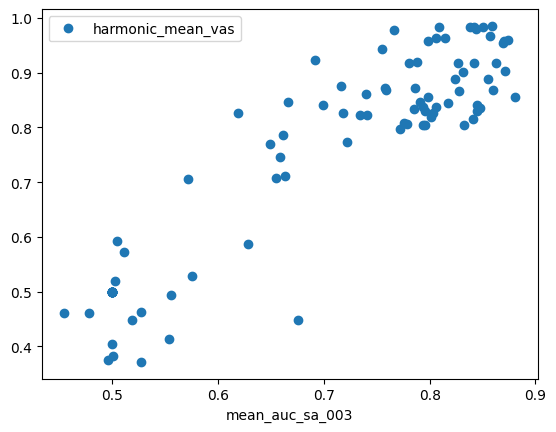

In [58]:
df.plot(x='mean_auc_sa_003', y='harmonic_mean_vas', style='o')

Text(0.2, 0.8, 'r=0.92')

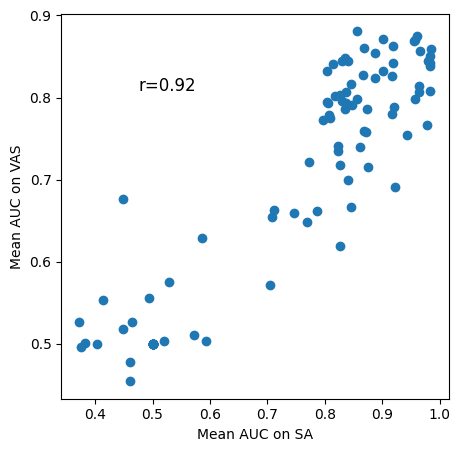

In [72]:
# let's improve the plot 
import matplotlib.pyplot as plt
import numpy as np
y = df['mean_auc_sa_003']
x = df['harmonic_mean_vas']
corr = np.corrcoef(x, y)[0, 1]

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x, y)
ax.set_xlabel('Mean AUC on SA')
ax.set_ylabel('Mean AUC on VAS')
# write correlation coefficient on the plot
ax.text(0.2, 0.8, f'r={corr:.2f}', transform=ax.transAxes, fontsize=12)


In [137]:
from comet_ml.api import API
from config import settings
from tqdm import tqdm
import pandas as pd
import io
# Initialize the Comet API with your API key.
api = API(settings.comet['api_key'])

# Retrieve experiments from the specified workspace and project.
experiments = api.get(workspace=settings.comet['workspace'], project_name='psm-mdof2')

# List to hold data from assets.
data = []

# Loop over each experiment using tqdm to show progress.
for experiment in tqdm(experiments):
    # Load the specific experiment.
    experiment_id = experiment.id
    comet_exp = api.get_experiment(project_name='psm-mdof2', workspace=settings.comet['workspace'], experiment=experiment_id)
    
    # Get the list of assets for the experiment.
    assets_list = comet_exp.get_asset_list()
    
    # Temporary list to hold assets for the current experiment.
    assets = dict()
    
    # Loop over each asset in the list.
    for asset_info in assets_list:
        # Check if the asset is one of the desired files.
        if asset_info['fileName'] in ['auc_vas_table.csv', 'auc_sa_table.csv']:
            # Download the asset using its ID with the correct return_type 'binary'.
            asset_data = comet_exp.get_asset(asset_info['assetId'], return_type='binary')
            
            # Convert the binary data to a file-like object.
            asset_data_file = io.BytesIO(asset_data)
            
            # Read the data into a pandas DataFrame.
            df = pd.read_csv(asset_data_file)
            df.set_index('Unnamed: 0', inplace=True)
            if asset_info['fileName'] =='auc_vas_table.csv':
                name = 'vas'
                row = df.loc['harmonic_mean']
                #select column

            else :
                name = 'sa'
                row = df.loc[0.03]

            assets[name] = row['system_1']

            # Append the DataFrame to the assets list.
        if assets:
            data.append(assets)
    


# `data` is now a list of lists, with each sublist containing the DataFrames for the assets from each experiment.


100%|██████████| 119/119 [01:10<00:00,  1.68it/s]


In [139]:
df

,system_0,system_1,system_2,system_3,system_4,system_5,system_6,system_7,system_8,system_9,system_10,system_11,system_12,system_13,system_14,system_15,system_16,system_17,system_18,system_19
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0.01,0.516700,0.482750,0.602375,0.467600,0.556200,0.522475,0.545100,0.484175,0.502800,0.531575,0.498975,0.559125,0.529625,0.528400,0.598625,0.464725,0.503300,0.530775,0.519800,0.473350
0.03,0.610550,0.683125,0.812950,0.470900,0.790550,0.764625,0.674575,0.657075,0.718250,0.774400,0.591850,0.843275,0.722850,0.819475,0.929550,0.757450,0.619175,0.844675,0.820400,0.780050
0.05,0.819950,0.867700,0.940375,0.582925,0.893875,0.967925,0.834900,0.872550,0.908525,0.946400,0.856100,0.967075,0.895600,0.966500,0.992375,0.967650,0.851650,0.976625,0.965125,0.969075
0.07,0.941600,0.973750,0.983075,0.724400,0.980500,0.996900,0.946825,0.970450,0.945500,0.993150,0.975275,0.997100,0.983250,0.989025,0.999825,0.997150,0.961850,0.994425,0.984425,0.997375
0.09,0.989125,0.996075,0.997550,0.879400,0.996975,0.999325,0.987000,0.995200,0.963100,0.999725,0.998150,0.999675,0.999250,0.998725,0.999950,0.999950,0.995575,0.999950,0.991925,0.999850
0.11,0.998050,0.999300,0.999175,0.964200,0.999950,1.000000,0.997450,0.999525,0.979750,1.000000,0.999900,0.999900,1.000000,0.999800,1.000000,1.000000,0.999800,1.000000,0.995700,1.000000
0.13,0.999800,0.999850,0.999875,0.997150,1.000000,1.000000,0.999400,1.000000,0.986925,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.997825,1.000000


,sa,vas
sa,1.000000,0.697796
vas,0.697796,1.000000


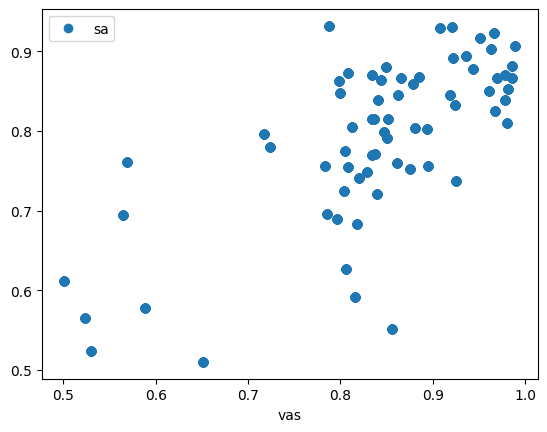

In [138]:
df_s=pd.DataFrame(data)
df_s = df_s.apply(pd.to_numeric)
# delet point below 0.5
df_s = df_s[df_s['vas']>0.5]
df_s = df_s[df_s['sa']>0.5]

df_s.plot(x='vas', y='sa', style='o')
df_s.corr()

In [126]:
# to numeric
exploded_df = exploded_df.apply(pd.to_numeric)

(0.5, 1.0)

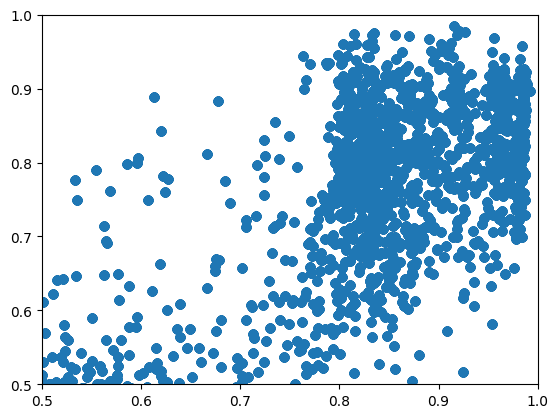

In [128]:
plt.scatter(exploded_df['vas'], exploded_df['sa'])
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)